<a href="https://colab.research.google.com/github/BHAVAYA7/Lecture-notes/blob/main/Copy_of_Exercise_22_Kapitza_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Bhavay Arora__
<br>
Date: Mar. 8, 2023
<br>
PHYS 2030 W23

__Rubric__ (100 points total):

- Part (a) /__50 points__
     
- Part (b) /__50 points__

# <center><font color=#46769B>Exercise 22: Kapitza's pendulum</font></center>

## <font color=#46769B>Introduction</font>

The goals of this exercise are:
- Gain further experience with RK4 methods for solving ODEs
- Study a system of ODEs with interesting behavior

Required reading:
- *Lesson 8: Second-order methods*


<font color=#46769B>Exercise</font>

Kapitza's pendulum is a pendulum in which the pivot is attached to a motor that causes the pivot to move up and down. 

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/KapitzaPendulumScheme.gif" width="240">
</div>

We assume that the vertical motion of the pivot is periodic, described by

$$y(t) = A \, \cos(\nu t)$$

where $A$ is the amplitude and $\nu$ is the angular frequency of the pivot's motion up and down. Recalling that the formula for torque is $\tau = F \ell \sin(\theta)$, where $F = m y''(t)$ is the force due to the pivot's motion on the pendulum arm and $\theta$ is the relative angle between the pendulum and the vertical, we arrive an equation of motion:

$$\theta''(t) + \omega^2 \sin(\theta(t)) + A \nu^2 \cos(\nu t) \sin(\theta(t)) = 0\, . \qquad (1)$$

The usual simple pendulum (recoved by setting $A=0$ above) has two equilibrium positions:
- Stable equilibrium point at $\theta=0$ (hanging straight down). A small push away from $\theta=0$ will lead to small oscillations around the point $\theta=0$.
- Unstable equilibrium point at $\theta = \pi$ (pointing straight up). An arbitrarily small push away from $\theta=\pi$ will lead to a large displacement.

The unusual feature of Kapitsa's pendulum is that a rapid driving force can cause the unstable point at $\theta=\pi$ *to become stable*. Here are one [video](https://www.youtube.com/watch?v=cjGqxF79ITI) and another [video](https://www.youtube.com/watch?v=GgYABmG_bto) that illustrate this phenomenon in action. (Some further links for the interested reader are [here](https://gereshes.com/2019/02/25/kapitzas-pendulum/) and [here](https://en.wikipedia.org/wiki/Kapitza%27s_pendulum).)

## <font color=#46769B>Part (a)</font>

Consider the following parameters:

$$\omega = 2\pi , \quad A = 0.1, \quad \nu = 100$$

Your tasks are as follows:
- Write a code to solve Kapitza's pendulum for the initial condition
$$ \theta(0) = 3, \quad \theta'(0) = 0 \, .$$
over the time interval $[0,10]$. Use the RK4 method (described in Lesson 10) to solve Eq. (1). Your results should do the convergence checking step, until your code has converged to within a tolerance of `atol=rtol=1e-2`.
- Make a plot showing $\theta(t)$ vs $t$ for Kapitsa's pendulum. Show also in the same plot, $\theta(t)$ vs $t$ for the simple pendulum with the same initial condition (i.e., solving the same ODE but with $A=0$). Include a legend and axes labels for your plot.
- What is your conclusion about whether $\theta=\pi$ is stable or unstable?
- Make a __phase portrait__ plot of $\theta'(t)$ vs $\theta(t)$ for both Kapitsa's pendulum and the simple pendulum (in separate plots). This plot is a nice way to visualize both position and velocity of a trajectory. It is easy to implement from your numerical solutions. Suppose your solutions are saved in a `numpy.array` named `y`, which has size $(N+1) \times 2$. Then you simply do:
```py
theta = y[:,0]
theta_prime = y[:,1]
plt.plot(theta,theta_prime)
```
since recall $\mathbf{y} = (\theta,\theta^\prime)$. Be sure to make your plot a square shape using the `figsize` keyword.

Feel free to use `scipy.integrate.solve_ivp` to check your numerical results, but it is not mandatory.



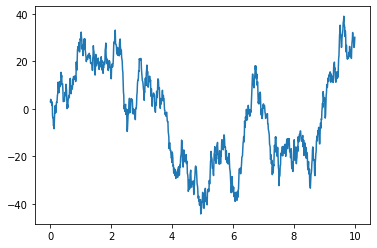

In [ ]:
from numpy.core.multiarray import array
import numpy as np
import matplotlib.pyplot as plt

omega = 2*np.pi
t0, tf = 0, 10

nu = 100
A = 0.1

theta0 = 3

# Your code here
N = 1000
h = tf/N

def f(t,u):
    return ((-omega**2 * np.sin(u)) + ((A * nu**2 * np.cos(nu*t)) * np.sin(u)))

u = np.zeros(N+1)
t = np.linspace(t0, tf, N+1)
u[0] = theta0

for i in range (N):
# Rk4 step in the loop
    k1 = f(t[i],u[i])
    k2 = f(t[i] +h/2, u[i] + k1*h/2)
    k3 = f(t[i] +h/2, u[i] + k2*h/2)
    k4 = f(t[i]+h, u[i] + k3*h)
    k = (k1 + 2*k2 + 2*k3 + k4) / 6
    u[i+1] = u[i] + h*k

plt.plot(t,u)

In [ ]:
from numpy.core.multiarray import array
import numpy as np
import matplotlib.pyplot as plt


omega = 2*np.pi
t0, tf = 0, 10

nu = 100
A = 0.1

theta0 = 3

# Your code here
N = 1000

h = tf/N

def f(t,y):
    y1, y2 = y
    return np.array ([y2, ((-omega**2 * np.sin(y1)) + (A * nu**2 * np.cos(nu*t)) * np.sin(y1))])

def rk4_step(t,y,f,h):
    y = np.zeros((N+1, 2))
    t = np.linspace(t0, tf, N+1)
    y[0] = [theta0, 0]

    for i in range (N):
        k1 = f(t[i],y[i])
        k2 = f(t[i] +h/2, y[i] + k1*h/2)
        k3 = f(t[i] +h/2, y[i] + k2*h/2)
        k4 = f(t[i]+h, y[i] + k3*h)
        k = (k1 + 2*k2 + 2*k3 + k4) / 6
        y[i+1] = y[i] + h*k
 
    return(y)



# Performing the convergence test
y_org = y

converged = False

while not (converged):
    N = N * 2

    print("Not converged yet, trying again with ",N, " steps")

    y_con = rk4_step(t,y,f,h)

    converged = np.allclose(y_org,y_con[::2],atol= 1e-2,rtol=1e-2 )
    y_org = y_con

print("Now converged at ",N," steps")

Not converged yet, trying again with  2000  steps
Not converged yet, trying again with  4000  steps
Not converged yet, trying again with  8000  steps
Not converged yet, trying again with  16000  steps
Not converged yet, trying again with  32000  steps
Not converged yet, trying again with  64000  steps
Not converged yet, trying again with  128000  steps
Not converged yet, trying again with  256000  steps
Not converged yet, trying again with  512000  steps
Not converged yet, trying again with  1024000  steps
Not converged yet, trying again with  2048000  steps
Not converged yet, trying again with  4096000  steps
Not converged yet, trying again with  8192000  steps
Not converged yet, trying again with  16384000  steps


KeyboardInterrupt: ignored

In [ ]:

for i in range (N):
    ti = t[i]
    ui = u[i]
    k1 = f(ti,ui)
    k2 = f(ti +h/2, ui + k1*h/2)
    k3 = f(ti +h/2, ui + k2*h/2)
    k4 = f(ti + h, ui + k3*h)
    k = (k1 + 2*k2 + 2*k3 + k4) / 6
    u = ui + h*k

## <font color=#46769B>Part (b)</font>

  In Part (a), you noticed that Kapitza's pendulum seems to oscillate around an equilibrium $\theta_{\rm eq} = \pi$, while the simple pendulum oscillates around $\theta_{\rm eq} = 0$. A simple way to see this more clearly is to include a damping term

$$\theta''(t) + \gamma \theta'(t) + \omega^2 \sin(\theta(t)) + A \nu^2 \cos(\nu t) \sin(\theta(t)) = 0\, \qquad (2)$$

and seeing where the pendulum ends up after its motion has been damped away, i.e., 

$$\theta(t_f) \approx \theta_{\rm eq} \, .$$

Here set $\gamma = 1$ and consider the same time interval $[0,10]$. The initial condition will be

$$\theta(0) = \theta_0, \quad \theta'(0) = 0 \, .$$

Keeping other inputs fixed as in Part (a), perform the following tasks:
- Determine the value of $\theta_{\rm eq}$ as a function of the initial displacement $\theta_0$, for a list of initial values `theta0_list = numpy.linspace(0.1,3.1,num=31)`. Make a plot of $\theta_{\rm eq}$ as a function of the $\theta_0$ values. You should find that below a certain critical value, $\theta_0^{\rm crit}$, Kapitza's pendulum relaxes to $\theta_{\rm eq} = 0$, while above $\theta_0^{\rm crit}$ it relaxes to $\theta_{\rm eq} = \pi$. Determine $\theta_{0}^{\rm crit}$.

Does $\theta_{0}^{\rm crit}$ change if you shake the pendulum harder (increasing $A$) or faster (increasing $\nu$)? You just need to be qualitative here:
- Repeat the above steps to determine $\theta_0^{\rm crit}$ with all inputs as above but changing $A = 1$ (and $\nu = 100$).
- Repeat the above steps to determine $\theta_0^{\rm crit}$ with all inputs as above but changing $\nu = 300$ (and $A = 0.1$).
- Make plots of $\theta_{\rm eq}$ as a function of the $\theta_0$ values for the different inputs here.

Feel free to use `scipy.integrate.solve_ivp` to check your numerical results, but it is not mandatory. Note if you do use `solve_ivp`, it may be useful to increase the tolerance settings by adding thse keywords, e.g., `atol=1e-10, rtol=1e-10`.



In [ ]:
# Your code here